In [ ]:
#loading in adjusted array 


In [ ]:
import numpy as np 
df = np.load('/content/drive/MyDrive/Colab Notebooks/final_array.npy')

In [ ]:
#checking shape of array 
df.shape

(2730, 5, 280, 280, 1)

**load in first 2500 images and bring in cancer and benign list**

In [ ]:
#making cancer and benign list 
cancer_list = [3 for _ in range(82)]
#making benign list
benign_list = [2 for _ in range(148)]
combined_list = cancer_list + benign_list
combined_list[229]

2

In [ ]:
#loading in the labels df 
import pandas as pd 
label = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Labels.csv")

In [ ]:
#one hot encoding into one column 
label.loc[label['Normal'] == 1, 'one_hot_encoded_col'] = 0
label.loc[label['Actionable'] == 1, 'one_hot_encoded_col'] = 1
label.loc[label['Benign'] == 1, 'one_hot_encoded_col'] = 2
label.loc[label['Cancer'] == 1, 'one_hot_encoded_col'] = 3

# display the resulting dataframe
print(label)

       PatientID    StudyUID  View  Normal  Actionable  Benign  Cancer  \
0     DBT-P00023  DBT-S04378  lmlo       0           1       0       0   
1     DBT-P00023  DBT-S04378  rmlo       0           1       0       0   
2     DBT-P00029  DBT-S00044  lmlo       1           0       0       0   
3     DBT-P00029  DBT-S00044  rmlo       1           0       0       0   
4     DBT-P00032  DBT-S04706  lmlo       1           0       0       0   
...          ...         ...   ...     ...         ...     ...     ...   
9483  DBT-P02569  DBT-S01802  rmlo       1           0       0       0   
9484  DBT-P04356  DBT-S00073  lmlo       1           0       0       0   
9485  DBT-P04356  DBT-S00073  rmlo       1           0       0       0   
9486  DBT-P01481  DBT-S01753  lmlo       1           0       0       0   
9487  DBT-P01481  DBT-S01753  rmlo       1           0       0       0   

      one_hot_encoded_col  
0                     1.0  
1                     1.0  
2                     0.0  

In [ ]:
#making list of the one hote encoded collumn 
#making list of first 3000 observations 
one_hot_encoded_list = label.iloc[:2500]['one_hot_encoded_col'].tolist()

In [ ]:
one_hot_encoded_list = combined_list + one_hot_encoded_list

In [ ]:
#checking length of list 
len(one_hot_encoded_list)

2730

In [ ]:
from collections import Counter

one_hot_encoded_counts = Counter(one_hot_encoded_list)
print(one_hot_encoded_counts)

Counter({0.0: 2128, 1.0: 358, 2: 158, 3: 86})


In [ ]:
#getting first 1500 observations
one_hot_encoded_list = one_hot_encoded_list[:1500]
df = df[:1500, :, :, :, :]


In [ ]:
df.shape

(1500, 5, 280, 280, 1)

In [5]:
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 47.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp310-cp310-linux_x86_64.whl size=3541513 sha256=de1f79715a5544e3d6239eed743c89bc1d831c7d3ce80ca592abaef6ae1e93b3
  Stored in directory: /root/.cache/pip/wheels/dc/52/e3/6c6b60b126b4d5c4370cb5ac071b82950f91649d62d72f7f56
Successfully built hdbscan


In [28]:
import numpy as np
df = np.load('/content/drive/MyDrive/Colab Notebooks/VGG16_features.npy')

In [29]:
df.shape

(2730, 64)

**HDBscan consensus clustering**

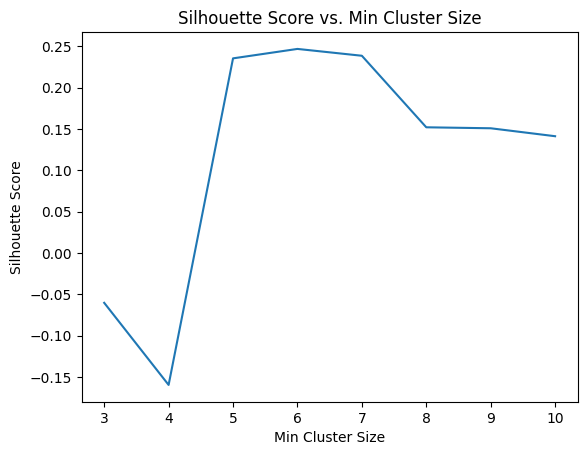

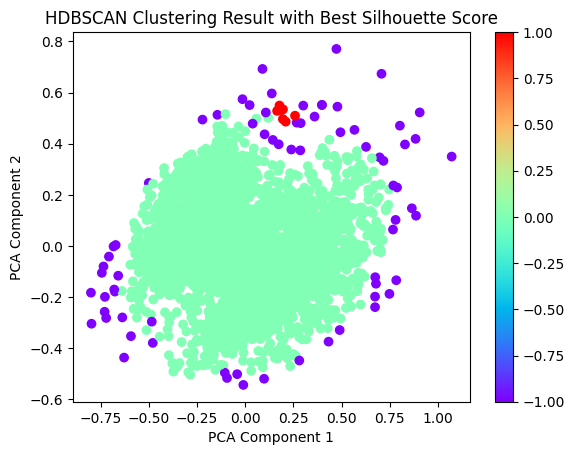

In [35]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import hdbscan

# assume that `data` is a 5D numpy array with shape (n_samples, d1, d2, d3, d4)

# reshape the 5D array into a 2D array
data_2d =df

# create a PCA object with 2 components
pca = PCA(n_components=2)

# fit the PCA model to the data
data_transformed = pca.fit_transform(data_2d)

# create a range of min_cluster_size values to try
min_cluster_sizes = range(3, 11)

# create empty lists to store silhouette scores and cluster labels
silhouette_scores = []
cluster_labels = []

# loop over the range of min_cluster_size values and compute the silhouette scores and cluster labels for each value
for min_cluster_size in min_cluster_sizes:
    # create an HDBSCAN clustering model with the current min_cluster_size value
    hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size)

    # fit the model to the transformed data
    hdbscan_model.fit(data_transformed)

    # get the cluster labels for each data point
    labels = hdbscan_model.labels_

    # compute the silhouette score
    score = silhouette_score(data_transformed, labels)

    # append the silhouette score and cluster labels to the lists
    silhouette_scores.append(score)
    cluster_labels.append(labels)

# find the index of the maximum silhouette score
max_score_index = np.argmax(silhouette_scores)

# plot the silhouette scores
plt.plot(min_cluster_sizes, silhouette_scores)
plt.xlabel('Min Cluster Size')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Min Cluster Size')
plt.show()

# plot the clusters with the best min_cluster_size
plt.scatter(data_transformed[:, 0], data_transformed[:, 1], c=cluster_labels[max_score_index], cmap='rainbow')
plt.colorbar()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('HDBSCAN Clustering Result with Best Silhouette Score')
plt.show()




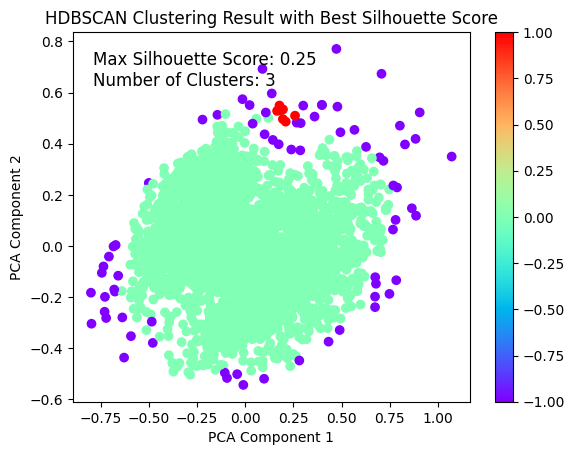

In [36]:
# Get the unique cluster labels and number of clusters
unique_labels = np.unique(cluster_labels[max_score_index])
num_clusters = len(unique_labels)

# Plot the clusters with the best min_cluster_size
plt.scatter(data_transformed[:, 0], data_transformed[:, 1], c=cluster_labels[max_score_index], cmap='rainbow')
plt.colorbar()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('HDBSCAN Clustering Result with Best Silhouette Score')

# Add annotation for the maximum silhouette score value and number of clusters
max_score = silhouette_scores[max_score_index]
plt.annotate(f"Max Silhouette Score: {max_score:.2f}\nNumber of Clusters: {num_clusters}", 
             xy=(0.05, 0.95), 
             xycoords='axes fraction', 
             fontsize=12, 
             ha='left', 
             va='top')

plt.show()



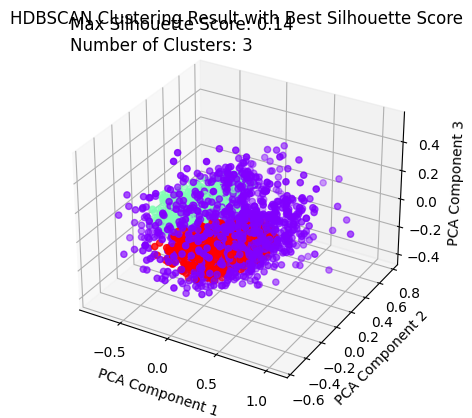

In [34]:
from mpl_toolkits.mplot3d import Axes3D

# Get the unique cluster labels and number of clusters
unique_labels = np.unique(cluster_labels[max_score_index])
num_clusters = len(unique_labels)

# Plot the clusters with the best min_cluster_size in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_transformed[:, 0], data_transformed[:, 1], data_transformed[:, 2], c=cluster_labels[max_score_index], cmap='rainbow')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('HDBSCAN Clustering Result with Best Silhouette Score')

# Add annotation for the maximum silhouette score value and number of clusters
max_score = silhouette_scores[max_score_index]
ax.text2D(0.05, 0.95, f"Max Silhouette Score: {max_score:.2f}\nNumber of Clusters: {num_clusters}", transform=ax.transAxes, fontsize=12)

plt.show()


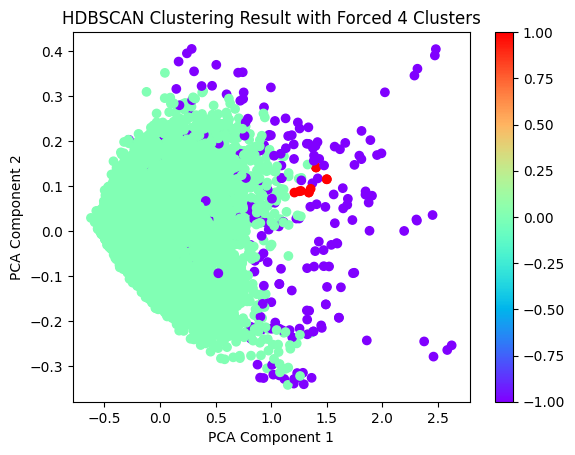

Silhouette Score for Forced 4 Clusters: 0.61


In [21]:
# Set the min_cluster_size parameter to a high value to force 4 clusters
min_cluster_size = 5

# Create an HDBSCAN clustering model with the forced min_cluster_size value
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size)

# Fit the model to the transformed data
hdbscan_model.fit(data_transformed)

# Get the cluster labels for each data point
labels = hdbscan_model.labels_

# Plot the clusters
plt.scatter(data_transformed[:, 0], data_transformed[:, 1], c=labels, cmap='rainbow')
plt.colorbar()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('HDBSCAN Clustering Result with Forced 4 Clusters')
plt.show()
# Compute the silhouette score for the forced 4 clusters
score = silhouette_score(data_transformed, labels)

# Print the silhouette score
print(f"Silhouette Score for Forced 4 Clusters: {score:.2f}")


In [7]:
print(silhouette_scores)

[-0.38695455, 0.7409494, 0.58947587, 0.60910225, -0.13796753, 0.47481525, 0.47799674, -0.27830595, -0.28647575]


In [8]:
from tensorflow.python.ops.math_ops import Max
print(max_score_index)

1


**kmeans consensur clustering **

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

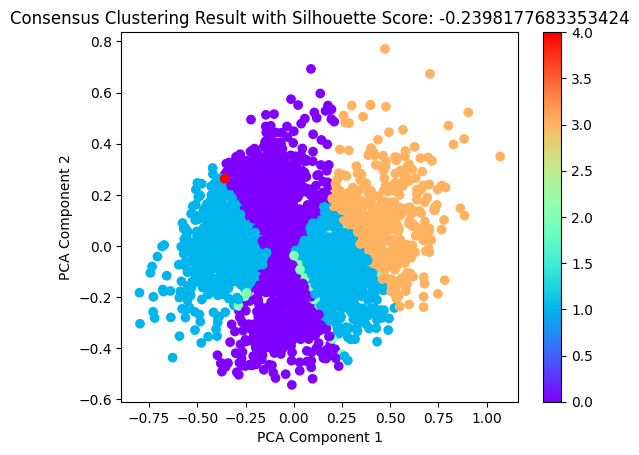

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# assume that `data` is a 5D numpy array with shape (n_samples, d1, d2, d3, d4)

# reshape the 5D array into a 2D array
data_2d = df

# create a PCA object with 15 components
pca = PCA(n_components=2)

# fit the PCA model to the data
data_transformed = pca.fit_transform(data_2d)

# set the number of clustering algorithms to run
n_clustering_algorithms = 10

# create empty list to store cluster labels
cluster_labels = []

# loop over the range of clustering algorithms and compute the cluster labels for each algorithm
for i in range(n_clustering_algorithms):
    # create a KMeans clustering model with a random initialization
    kmeans_model = KMeans(n_clusters=5, init='random')

    # fit the model to the transformed data
    kmeans_model.fit(data_transformed)

    # get the cluster labels for each data point
    labels = kmeans_model.labels_

    # append the cluster labels to the list
    cluster_labels.append(labels)

# compute the consensus clustering solution by majority voting
consensus_labels = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=cluster_labels)

# compute the silhouette score
score = silhouette_score(data_transformed, consensus_labels)

# plot the clusters
plt.scatter(data_transformed[:, 0], data_transformed[:, 1], c=consensus_labels, cmap='rainbow')
plt.colorbar()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Consensus Clustering Result with Silhouette Score: {}'.format(score))
plt.show()


Number of clusters: 5


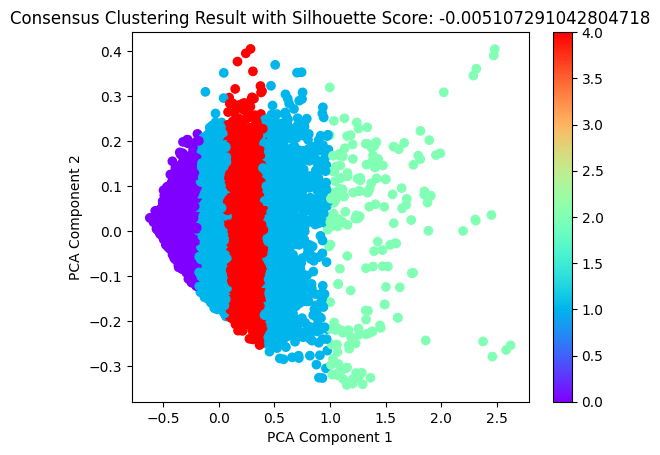

In [19]:
# compute the consensus clustering solution by majority voting
consensus_labels = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=cluster_labels)

# get the number of clusters
n_clusters = len(np.unique(consensus_labels))
print("Number of clusters:", n_clusters)

# compute the silhouette score
score = silhouette_score(data_transformed, consensus_labels)

# plot the clusters
plt.scatter(data_transformed[:, 0], data_transformed[:, 1], c=consensus_labels, cmap='rainbow')
plt.colorbar()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Consensus Clustering Result with Silhouette Score: {}'.format(score))
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

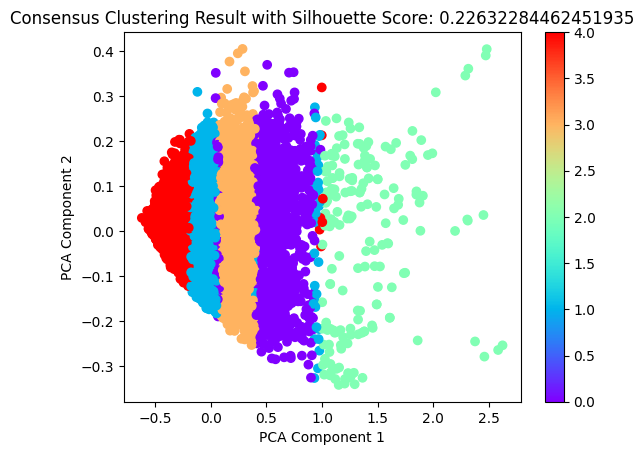

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# assume that `data` is a 5D numpy array with shape (n_samples, d1, d2, d3, d4)

# reshape the 5D array into a 2D array
data_2d = df

# create a PCA object with 15 components
pca = PCA(n_components=15)

# fit the PCA model to the data
data_transformed = pca.fit_transform(data_2d)

# set the number of clustering algorithms to run
n_clustering_algorithms = 10

# create empty list to store cluster labels
cluster_labels = []

# loop over the range of clustering algorithms and compute the cluster labels for each algorithm
for i in range(n_clustering_algorithms):
    # create a KMeans clustering model with a random initialization
    kmeans_model = KMeans(n_clusters=5, init='random')

    # fit the model to the transformed data
    kmeans_model.fit(data_transformed)

    # get the cluster labels for each data point
    labels = kmeans_model.labels_

    # append the cluster labels to the list
    cluster_labels.append(labels)

# compute the consensus clustering solution by majority voting
consensus_labels = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=cluster_labels)

# compute the silhouette score
score = silhouette_score(data_transformed, consensus_labels)

# plot the clusters
plt.scatter(data_transformed[:, 0], data_transformed[:, 1], c=consensus_labels, cmap='rainbow')
plt.colorbar()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Consensus Clustering Result with Silhouette Score: {}'.format(score))
plt.show()


In [24]:
# get the cluster labels for each data point
labels = kmeans_model.labels_

# print the number of clusters
n_clusters = len(set(labels))
print("Number of clusters:", n_clusters)


Number of clusters: 5


**Concensus clustering using GMMC**

In [26]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform

# assume that `data` is a 5D numpy array with shape (n_samples, d1, d2, d3, d4)

# reshape the 5D array into a 2D array
data_2d = df

# create a PCA object with 2 components
pca = PCA(n_components=100)

# fit the PCA model to the data
data_transformed = pca.fit_transform(data_2d)

# create a range of min_cluster_size values to try
min_cluster_sizes = range(3, 11)

# create empty lists to store silhouette scores and cluster labels
silhouette_scores = []
cluster_labels = []

# loop over the range of min_cluster_size values and compute the silhouette scores and cluster labels for each value
for min_cluster_size in min_cluster_sizes:
    # create a list to store the cluster assignments from each GMM model
    gmm_labels_list = []

    # create a list to store the pairwise distances between the GMM cluster assignments
    dist_matrix_list = []

    # fit and predict multiple GMM models with random initializations
    for i in range(10):
        gmm = GaussianMixture(n_components=min_cluster_size, random_state=i)
        gmm_labels = gmm.fit_predict(data_transformed)
        gmm_labels_list.append(gmm_labels)

    # compute the pairwise distances between the GMM cluster assignments
    dist_matrix = pdist(gmm_labels_list, metric='hamming')
    dist_matrix = squareform(dist_matrix)
    dist_matrix_list.append(dist_matrix)

    # apply the consensus clustering algorithm to the pairwise distance matrix
    consensus_labels = AgglomerativeClustering(n_clusters=min_cluster_size, linkage='average', affinity='precomputed').fit_predict(dist_matrix_list[0])

    # compute the silhouette score
    score = silhouette_score(data_transformed, consensus_labels)

    # append the silhouette score and cluster labels to the lists
    silhouette_scores.append(score)
    cluster_labels.append(consensus_labels)

# find the index of the maximum silhouette score
max_score_index = np.argmax(silhouette_scores)

# plot the silhouette scores
plt.plot(min_cluster_sizes, silhouette_scores)
plt.xlabel('Min Cluster Size')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Min Cluster Size')
plt.show()

# plot the clusters with the best min_cluster_size
plt.scatter(data_transformed[:, 0], data_transformed[:, 1], c=cluster_labels[max_score_index], cmap='rainbow')
plt.colorbar()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Consensus GMM Clustering Result with Best Silhouette Score')
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


ValueError: ignored

**Untuned modeel**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import hdbscan
import numpy as np
import pandas as pd
from tensorflow.keras.applications.resnet50 import ResNet50

# Load the DICOM array (assuming it has shape [num_images, depth, height, width, num_channels])
dicom_array = df
labels = one_hot_encoded_list

# Repeat single channel 3 times to create 3-channel input
dicom_array = np.repeat(dicom_array, 3, axis=-1)

# Convert labels to one-hot encoded vectors
labels = np.asarray(labels)
labels = labels.astype(np.int32)
num_classes = np.max(labels) + 1  # Add 1 to account for 0-indexing
labels_one_hot = tf.keras.utils.to_categorical(labels, num_classes)

# Parameters
input_shape = (5, 280, 280, 3)

# Load the pre-trained 2D ResNet50 model, excluding the top layer
base_model = ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=input_shape[1:]
)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = True

# Custom model to handle the 5D input
input_layer = layers.Input(shape=input_shape, name="input")
x = layers.TimeDistributed(base_model)(input_layer)
x = layers.Conv3D(64, kernel_size=(1, 3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling3D(pool_size=(1, 2, 2))(x)
x = layers.BatchNormalization()(x)
x = layers.GlobalAveragePooling3D()(x)
x = layers.Dropout(0.3)(x)
output_layer = layers.Dense(num_classes, activation='softmax', name="output")(x)

# Create the model
model = keras.Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model to the data
model.fit(dicom_array, labels_one_hot, batch_size=18, epochs=10, verbose=1)

# Extract the features using the trained model
features = base_model.predict(dicom_array)

# Cluster the features using HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=2)
cluster_labels = clusterer.fit_predict(features.reshape(features.shape[0], -1))

# Calculate the silhouette score
silhouette_score = hdbscan.approximate_predictive_posterior(
    features.reshape(features.shape[0], -1), clusterer
).mean()

print("Silhouette score:", silhouette_score)




Epoch 1/10
84/84 [==============================] - 74s 320ms/step - loss: 1.3168 - accuracy: 0.3800
Epoch 2/10
84/84 [==============================] - 25s 296ms/step - loss: 1.0835 - accuracy: 0.6107
Epoch 3/10
84/84 [==============================] - 25s 296ms/step - loss: 0.9206 - accuracy: 0.7140
Epoch 4/10
84/84 [==============================] - 25s 296ms/step - loss: 0.7918 - accuracy: 0.7873
Epoch 5/10
84/84 [==============================] - 25s 296ms/step - loss: 0.6730 - accuracy: 0.8420
Epoch 6/10
84/84 [==============================] - 25s 297ms/step - loss: 0.5616 - accuracy: 0.8967
Epoch 7/10
84/84 [==============================] - 25s 297ms/step - loss: 0.4206 - accuracy: 0.9480
Epoch 8/10
84/84 [==============================] - 25s 296ms/step - loss: 0.3172 - accuracy: 0.9740
Epoch 9/10
84/84 [==============================] - 25s 297ms/step - loss: 0.2337 - accuracy: 0.9847
Epoch 10/10
84/84 [==============================] - 25s 296ms/step - loss: 0.1994 - accura

ValueError: ignored

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import numpy as np
import itertools
y_pred = model.predict(X_test)

# Calculate AUC-ROC score
auc = roc_auc_score(y_test, y_pred, multi_class='ovr')

# Calculate confusion matrix
y_true_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Calculate sensitivity and specificity for each class
num_classes = y_test.shape[1]
sensitivity = []
specificity = []
for i in range(num_classes):
    true_positives = cm[i,i]
    false_positives = cm[:,i].sum() - true_positives
    false_negatives = cm[i,:].sum() - true_positives
    true_negatives = cm.sum() - true_positives - false_positives - false_negatives
    
    sensitivity.append(true_positives / (true_positives + false_negatives))
    specificity.append(true_negatives / (true_negatives + false_positives))

# Calculate overall accuracy, sensitivity, specificity, and F1-score
overall_accuracy = accuracy_score(y_true_classes, y_pred_classes)
overall_sensitivity = np.mean(sensitivity)
overall_specificity = np.mean(specificity)
overall_f1_score = f1_score(y_true_classes, y_pred_classes, average='macro')

# Print overall metrics
print(f'Overall Accuracy: {overall_accuracy:.2f}')
print(f'Overall Sensitivity: {overall_sensitivity:.2f}')
print(f'Overall Specificity: {overall_specificity:.2f}')
print(f'Overall F1-score: {overall_f1_score:.2f}')

# Plot ROC curve
class_names = ['Normal', 'Actionable', 'Benign', 'Cancer']
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = roc_auc_score(y_test[:, i], y_pred[:, i])
    plt.plot(fpr[i], tpr[i], label='ROC curve (AUC = %0.2f) for %s' % (roc_auc[i], class_names[i]))

plt.plot([0, 1], [0, 1], 'k--', label='Random guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc="lower right")

plt.show()

# Plot confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Multiclass Classification')
plt.colorbar()

tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

plt.show()

**Tuned model**



In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using {device} device")

# Load the DICOM array (assuming it has shape [num_images, depth, height, width, num_channels])
dicom_array = df
labels = one_hot_encoded_list

# Repeat single channel 3 times to create 3-channel input
dicom_array = np.repeat(dicom_array, 3, axis=-1)

# Convert labels to one-hot encoded vectors
labels = np.asarray(labels)
labels = labels.astype(np.int32)
num_classes = np.max(labels) + 1  # Add 1 to account for 0-indexing
labels_one_hot = torch.from_numpy(labels).long()  # convert to long tensor
labels_one_hot = nn.functional.one_hot(labels_one_hot, num_classes=num_classes).float()  # apply one_hot() on long tensor and then convert to float tensor


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    dicom_array, labels_one_hot, test_size=0.2, random_state=42, stratify=labels
)

# Parameters
input_shape = (3, 280, 280)

# Load the pre-trained 2D AlexNet model, excluding the top layer
base_model = models.alexnet(pretrained=True)
base_model = nn.Sequential(*list(base_model.children())[:-1])

# Freeze the base model layers
for param in base_model.parameters():
    param.requires_grad = False

# Custom model to handle the 5D input
class AlexNet3D(nn.Module):
    def __init__(self, base_model, num_classes):
        super(AlexNet3D, self).__init__()
        self.base_model = base_model
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(43264, 4096)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(4096, 4096)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(4096, num_classes)
        
    def forward(self, x):
        x = self.base_model(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Create the model
model = AlexNet3D(base_model, num_classes)
model = model.to(device)

# Define the hyperparameter distribution
param_dist = {
    'lr': uniform(0.0001, 0.01),
    'dropout_rate': uniform(0.1, 0.4)
}

from skorch import NeuralNetClassifier

# Wrap the PyTorch model using the Skorch library
skorch_model = NeuralNetClassifier(
    module=model,
    criterion=nn.CrossEntropyLoss,
    optimizer=torch.optim.SGD,
    optimizer__momentum=0.9,
    max_epochs=10,
    batch_size=8,
    device=device
)

# Fit the model with randomized search
random_search = RandomizedSearchCV(
    estimator=skorch_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_train, y_train.argmax(axis=1))


# Print the best hyperparameters
print("Best score: %f using %s" % (random_search.best_score_, random_search.best_params_))

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim




In [ ]:
print(sensitivity)

[0.9482352941176471, 0.05555555555555555, 0.34375, 0.4117647058823529]


In [ ]:
print(specificity)

[0.23140495867768596, 0.9535864978902954, 1.0, 0.9886578449905482]


**bold text**

Tuned model 

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

if tf.test.is_gpu_available():
    print('GPU available:')
    for gpu in tf.config.list_physical_devices('GPU'):
        print(gpu)
    tf.config.set_visible_devices(gpu, 'GPU')
else:
    print('No GPU available.')

dicom_array = df
labels = one_hot_encoded_list
dicom_array = np.repeat(dicom_array, 3, axis=-1)

labels = np.asarray(labels)
labels = labels.astype(np.int32)
num_classes = np.max(labels) + 1
labels_one_hot = tf.keras.utils.to_categorical(labels, num_classes)

X_train, X_test, y_train, y_test = train_test_split(
    dicom_array, labels_one_hot, test_size=0.2, random_state=42, stratify=labels
)
def create_model(learning_rate=1e-5, dropout_rate=0.3):
    input_shape = (5, 280, 280, 3)

    # Load the VGG-16 model
    base_model = VGG16(
        include_top=False,
        weights='imagenet',
        input_shape=input_shape[1:]
    )

    # Freeze the base model layers
    for layer in base_model.layers:
        layer.trainable = True

    # Custom model to handle the 5D input
    input_layer = layers.Input(shape=input_shape, name="input")
    x = layers.TimeDistributed(base_model)(input_layer)
    x = layers.Conv3D(64, kernel_size=(1, 3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling3D(pool_size=(1, 2, 2))(x)
    x = layers.BatchNormalization()(x)
    x = layers.GlobalAveragePooling3D()(x)
    x = layers.Dropout(dropout_rate)(x)
    output_layer = layers.Dense(num_classes, activation='softmax', name="output")(x)

    # Create the model
    model = keras.Model(inputs=input_layer, outputs=output_layer)

    # Compile the model
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=8, verbose=1)

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [1e-4, 1e-5, 1e-6],
    'dropout_rate': [0.3, 0.4, 0.5]
}

# Create the GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)

# Fit the model with Grid Search
grid_result = grid.fit(X_train, y_train)

# Print the best hyperparameters
print("Best score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Train the model with the best hyperparameters on the entire training set
best_learning_rate = grid_result.best_params_['learning_rate']
best_dropout_rate = grid_result.best_params_['dropout_rate']
best_model = create_model(learning_rate=best_learning_rate, dropout_rate=best_dropout_rate)
best_model.fit(X_train, y_train, epochs=10, batch_size=8)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


GPU available:
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


<ipython-input-11-e1f0127ac525>:62: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=8, verbose=1)


18/18 [==============================] - 8s 174ms/step
Overall Accuracy: 0.76
Overall Sensitivity: 0.48
Overall Specificity: 0.81
Overall F1-score: 0.53


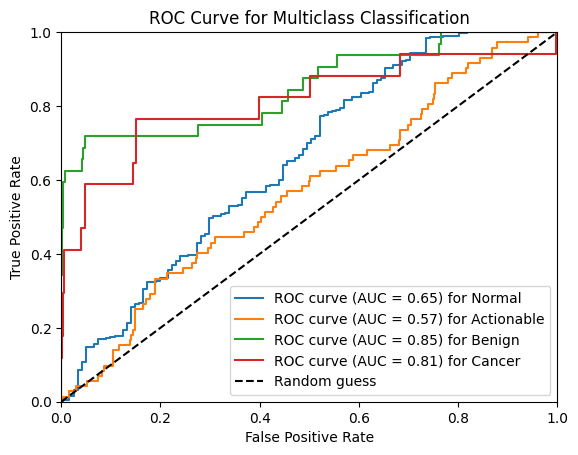

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import numpy as np

y_pred = model.predict(X_test)

auc = roc_auc_score(y_test, y_pred, multi_class='ovr')

y_true_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_true_classes, y_pred_classes)

num_classes = y_test.shape[1]
sensitivity = []
specificity = []
for i in range(num_classes):
    true_positives = cm[i,i]
    false_positives = cm[:,i].sum() - true_positives
    false_negatives = cm[i,:].sum() - true_positives
    true_negatives = cm.sum() - true_positives - false_positives - false_negatives
    
    sensitivity.append(true_positives / (true_positives + false_negatives))
    specificity.append(true_negatives / (true_negatives + false_positives))

# Calculate overall accuracy, sensitivity, specificity, and F1-score
overall_accuracy = accuracy_score(y_true_classes, y_pred_classes)
overall_sensitivity = np.mean(sensitivity)
overall_specificity = np.mean(specificity)
overall_f1_score = f1_score(y_true_classes, y_pred_classes, average='macro')

# Print overall metrics
print(f'Overall Accuracy: {overall_accuracy:.2f}')
print(f'Overall Sensitivity: {overall_sensitivity:.2f}')
print(f'Overall Specificity: {overall_specificity:.2f}')
print(f'Overall F1-score: {overall_f1_score:.2f}')

class_names = ['Normal', 'Actionable', 'Benign', 'Cancer']
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = roc_auc_score(y_test[:, i], y_pred[:, i])
    plt.plot(fpr[i], tpr[i], label='ROC curve (AUC = %0.2f) for %s' % (roc_auc[i], class_names[i]))

plt.plot([0, 1], [0, 1], 'k--', label='Random guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc="lower right")

plt.show()

